<a href="https://colab.research.google.com/github/lejimmy/yahoo-finance-stock-prediction/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment: Stock Prediction

The homework for this week is to build 3 different types of regression lines to predict stock prices using Python, then print out the prediction for the best performing one.

**Step 1** - Go to Yahoo Finance and find a stock price that you want to predict. Click on historical data, then download the CSV of that stocks price history https://finance.yahoo.com/quote/AAPL/history?p=AAPL  

**Step 2** - Use Scikit learn to try out 3 different types of regression models to predict the price of that stock for a future date. See this https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7  as an example and the scikit learn docs to see all the different types of regression models you can easily build (i.e quadratic, linear, lasso, ridge, etc.)

**Step 3** - Visualize your result using matplotlib or another plotting library of your choice

Once your code is complete, upload it to GitHub and send the github link to gradedhomeworkassignments@gmail.com with your full name as the subject line.  Good luck!

## Step 1: Download stock prices from Yahoo Finance

First we'll connect and authenticate Drive.  This will allow us to save our results directly to Google Drive.

In [1]:
# drive to connect with Google Drive
from google.colab import drive
drive.mount('drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [2]:
# change directory to folder you want to save files
%cd "/content/drive/My Drive/Colab Notebooks/Make Money with Machine Learning Course/"

/content/drive/My Drive/Colab Notebooks/Make Money with Machine Learning Course


Next, we import some common tools for data processing and visualizations.

In [0]:
# numpy for matrix math & data pre-processing
import numpy as np

# pandas for data formatting
import pandas as pd

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Next, we'll install and import a couple of tools to help us access Yahoo Finance and read them directly into pandas.

In [4]:
# yfinance library to access yahoo finance
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=fc3ca8a3c01e5d55442186d500d61ba71e0f30bede903221255d1c3349aeb11c
  Stored in directory: /tmp/pip-ephem-wheel-cache-rnifr4io/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [0]:
# pdr for reading csv files
from pandas_datareader import data as pdr
# yf for reading into pandas
import fix_yahoo_finance as yf

# override pandas datareader
yf.pdr_override()

For this homework assignment I decided to choose the S&P 500 (^GSPC) index.  We will grab data from the beginning of 2018 to now.

In [6]:
# read stock ticker data into a data frame, reset the index
ticker = 'TSLA'

dataframe = pdr.get_data_yahoo(ticker, start='2010-01-01').reset_index()
dataframe.to_csv(ticker + ".csv", index=False)

[*********************100%***********************]  1 of 1 downloaded


Let's preview the first 5 lines:

In [7]:
# display first 5 rows
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


So it looks like we have the `Date`, the price the stock `Open`ed at, the `High` for the day, the `Low` for the day, the price the stock `Close`d at, and the `Volume` of trades for the day.

The `Adj Close` is the [closing price after adjustments for applicable splits and dividend distributions.](https://help.yahoo.com/kb/SLN28256.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAJh0n2Hm8FNdMS6st1eDjVCJv2GA1yBEYXtryrFngTRxXWqdFSnjY7Q1dXiLMopqjBRYej1O_4idlnELsxpsPPxVI2OihltyG_scon1Rsw7sjTxcX2SwmHHb1O76tKUd2-8bktaM6qfoXZrdqT-IiLC8cIXnyz2RLuAgxUVBrK-p)

Let's also check if there is any missing data:

In [8]:
# summary of dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 7 columns):
Date         2319 non-null datetime64[ns]
Open         2319 non-null float64
High         2319 non-null float64
Low          2319 non-null float64
Close        2319 non-null float64
Adj Close    2319 non-null float64
Volume       2319 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 126.9 KB


And get a numerical summary of our columns:

In [9]:
# numerical summary of dataframe
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000,2.319000e+03
mean,178.960781,182.062398,175.675947,178.960923,178.960923,5.317205e+06
std,113.382607,115.128437,111.505895,113.389493,113.389493,4.665792e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.820000,34.459999,33.160000,33.810001,33.810001,1.750850e+06
50%,209.020004,212.990005,205.800003,208.449997,208.449997,4.400700e+06
75%,261.125000,264.604996,255.775001,260.945007,260.945007,7.132800e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


Before we visualize our data, let's split our data into it's training and testing data sets in the following section.

This is best practice to not prevent unconscious bias to our results.

## Step 2: Use Linear Regression to predict prices for a future date.

### Prepare Data for Machine Learning Algorithms

For each Linear Regression model, we'll read in a clean copy of the data:

In [0]:
# read in a copy of csv and convert Date from string to datetime
df_full = pd.read_csv(ticker + ".csv", parse_dates=['Date'])

To prepare the data for our machine learning algorithm, we'll convert `Date` column from a `datetime` datatype to an integer.

In [0]:
# import datetime to convert date to ordinal
import datetime as dt

df_full['Date'] = df_full['Date'].apply(lambda x: x.toordinal())

We can use the following line of code later if we need to convert the date back into a `datetime`.

In [0]:
# to convert back to datetime
# df_full['Date'].apply(dt.datetime.fromordinal)

Next, we'll separate our data features (X) from the value we want to predict aka labels (y):

In [0]:
X = df_full.drop('Adj Close', axis=1)

In [0]:
y = df_full['Adj Close']

Next, we'll separate the data into a 90/10 ratio for our training and testing data set:

In [0]:
# testing ratio of 90%
train_ratio = 0.90

# training size
train_size = int(len(X) * train_ratio)

In [0]:
# split X and y into training and testing sets
X_train, X_test = X.loc[:train_size-1], X.loc[train_size:]
y_train, y_test = y.loc[:train_size-1], y.loc[train_size:]

Now that our data is separated, let's plot our training set only.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


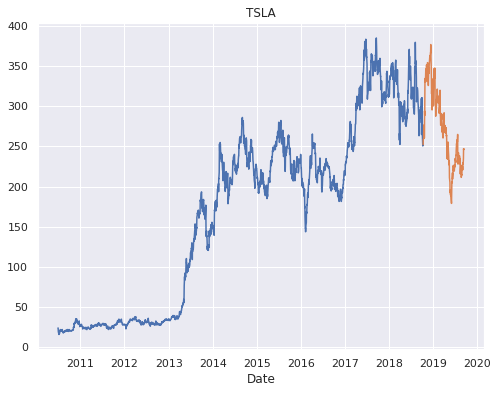

In [17]:
# create plot with dimension 8 x 6
f, ax = plt.subplots(figsize=(8,6))

# plot the dataframe, Date as x axis, Adj Close as y axis
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train.values)
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = y_test.values)
plt.title(ticker);

## Feature Scaling

Since most Machine Learning algorithms don't perform well when the numerical input attributes have very different scales, we will utilize Scikit-Learn's transformer called `StandardScaler` for standardization.

The `StandardScaler` will subtract each attribute by the mean of the attribute and divide by its standard deviation.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Pipeline constructor
full_pipeline = Pipeline([
        ('std_scaler', MinMaxScaler()),
])

# call the pipeline, fit and transform our features
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared

array([[0.00000000e+00, 7.71825928e-03, 2.24408851e-02, 7.02582803e-03,
        2.19122400e-02, 5.03376937e-01],
       [3.30578512e-04, 2.60423746e-02, 3.69724959e-02, 2.28339294e-02,
        2.17497291e-02, 4.60748163e-01],
       [6.61157025e-04, 2.39104060e-02, 2.49075054e-02, 1.45182093e-02,
        1.66847210e-02, 2.18658727e-01],
       ...,
       [9.99338843e-01, 6.70300872e-01, 6.73306934e-01, 6.42259231e-01,
        6.35861316e-01, 3.60482003e-01],
       [9.99669421e-01, 6.45284035e-01, 6.70652580e-01, 6.54060431e-01,
        6.69014052e-01, 3.22363910e-01],
       [1.00000000e+00, 6.70543743e-01, 6.67274439e-01, 6.38883553e-01,
        6.52979428e-01, 3.42736210e-01]])

## Training and Evaluation

First up... we'll use a basic linear regression model:

In [19]:
from sklearn.linear_model import LinearRegression

# LinearRegression constructor
lin_reg = LinearRegression()

# fit the training data and training labels
lin_reg.fit(X_prepared, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's view some of our data and see how the model did:

In [20]:
# view 5 instances of the training data and labels
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]

# transform our 5 instances through our pipeline
some_data_prepared = full_pipeline.fit_transform(some_data)

# print the results
print('Predictions: ', lin_reg.predict(some_data_prepared))
print('Labels: ', list(some_labels))

Predictions:  [385.         382.15274595 293.41180165 162.43602741  15.8       ]
Labels:  [23.889999, 23.83, 21.959999, 19.200001, 16.110001]


Looks pretty good based on the first few lines!

For a more robust look, let's measure the regression model's Root Mean Squared Error (RMSE) for the whole training set using Scikit-Learn's `mean_squared_error` function.

In [21]:
from sklearn.metrics import mean_squared_error

# predict the value of the stock using the prepared features
y_preds = lin_reg.predict(X_prepared)

# calculate error from training labels and predictions
lin_mse = mean_squared_error(y_train, y_preds)

# take the square root
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.186315141900932e-14

An error of almost zero?!  Our model is perfect!  Quick, let's put this into production and get rich now!

Or... the model is badly overfitting the data.  Let's graph our results to see what's going on:

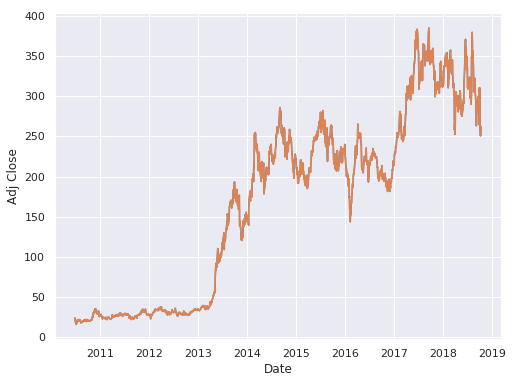

In [22]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train)
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_preds);

Indeed, we have precisely overfit our data!  Meaning that the model is not generalizing well.  Let's try another model before moving into more evaluation:

In [23]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree constructor
tree_reg = DecisionTreeRegressor()

# fit the prepared stock data and prices
tree_reg.fit(X_prepared, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [24]:
# predict the stock prices using our decision tree model
price_preds = tree_reg.predict(X_prepared)

# calculate the error from the price and predictions
tree_mse = mean_squared_error(y_train, price_preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.904910645259121e-16

An error of 0!  It looks like our decision tree model is also overfitting our data badly!  To get a better understanding of what's happening, let's use some of Scikit-Learn's cross-validation features.

## Cross Validation
Since classical cross-validation techniques will choose random testing and validation sets, we will need to consider the time series effects on our data.

Luckily, Scikit-Learn has the `TimeSeriesSplit` tool to help us do exactly that.  It is a varation on the *k-fold* cross-validation technique that uses subsequent folds as testing sets.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0101.png)

In [0]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

# create 10 sequential splits from the training data
tscv = TimeSeriesSplit(n_splits = 5)

# calculate MSE scores
lin_scores = cross_val_score(lin_reg, X_prepared, y_train, scoring = 'neg_mean_squared_error', cv = tscv)

# take square root
lin_reg_rmse_scores = np.sqrt(-lin_scores)

In [26]:
# function to display scores
def display_scores(scores):
  print('Scores: ', scores)
  print('Mean: ', scores.mean())
  print('Standard Deviation: ', scores.std())

# show linear regression scores
display_scores(lin_reg_rmse_scores)

Scores:  [5.03875430e-15 1.85184766e-14 1.17473404e-13 6.79604572e-14
 1.70973344e-13]
Mean:  7.599288722767569e-14
Standard Deviation:  6.187768124908992e-14


Let's see how our decision tree compares:

In [27]:
# calculate MSE scores
tree_scores = cross_val_score(tree_reg, X_prepared, y_train, scoring = 'neg_mean_squared_error', cv = tscv)

# take square root
tree_reg_rmse_scores = np.sqrt(-tree_scores)

# show decision tree scores
display_scores(tree_reg_rmse_scores)

Scores:  [  1.36832072 135.74142589   4.3022191    9.09250188  19.70199542]
Mean:  34.04129260304806
Standard Deviation:  51.23067498570127


Lastly, let's try an Elastic Net model to introduce regularization and better generalization to our predictions:

In [28]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X_prepared, y_train)

elastic_scores = cross_val_score(elastic_net, X_prepared, y_train, scoring = 'neg_mean_squared_error', cv = tscv)
elastic_rmse_scores = np.sqrt(-elastic_scores)

training_preds = elastic_net.predict(X_prepared)

display_scores(elastic_rmse_scores)

Scores:  [  7.74495195 147.3417674   37.81264698  12.10931525  24.17637922]
Mean:  45.83701215838635
Standard Deviation:  51.81766374799888


# Evaluate the Model

Let's use our model to predict the test set!

In [29]:
X_test.head()

,Date,Open,High,Low,Close,Volume
2087,736978,257.529999,262.250000,249.029999,252.229996,8167700
2088,736979,261.000000,261.989990,252.009995,258.779999,7201400
2089,736982,259.059998,263.279999,254.539993,259.589996,6200000
2090,736983,265.700012,277.380005,262.239990,276.589996,9526400
2091,736984,282.399994,282.700012,265.799988,271.779999,8655500


In [0]:
X_test_prepared = full_pipeline.fit_transform(X_test)

final_predictions = elastic_net.predict(X_test_prepared)

In [31]:
final_mse_score = mean_squared_error(y_test, final_predictions)
final_rmse_score = np.sqrt(final_mse_score)
final_rmse_score

85.59254319004303

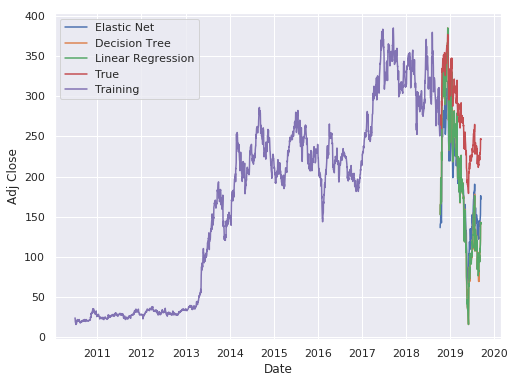

In [33]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = final_predictions, label = 'Elastic Net')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = tree_reg.predict(X_test_prepared), label = 'Decision Tree')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = lin_reg.predict(X_test_prepared), label = 'Linear Regression')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = y_test, label = 'True')
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train, label = 'Training')

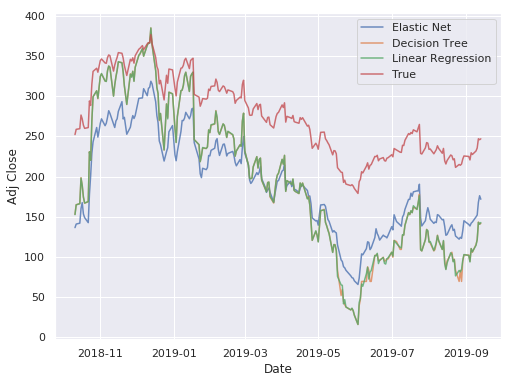

In [34]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = final_predictions, label = 'Elastic Net', alpha = 0.8)
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = tree_reg.predict(X_test_prepared), label = 'Decision Tree', alpha = 0.8)
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = lin_reg.predict(X_test_prepared), label = 'Linear Regression', alpha = 0.8)
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = y_test, label = 'True', alpha = 0.8)